In [2]:
print ("hello")

hello


In [3]:
#importing initial packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import xgboost as xgb

# Reading the dataset

In [4]:
#reading the data and keeping the index as the date and time

data = pd.read_csv('Turbine_Data.csv', parse_dates=['Unnamed: 0'],index_col=['Unnamed: 0'])
data.index = pd.to_datetime(data.index)

In [5]:
data.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN


In [6]:
data.duplicated().sum()

23039

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.duplicated().sum()

0

In [9]:
data.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2018-01-01 00:00:00+00:00,-5.357727,23.148729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.000000,-9.960830,NaN,NaN,G01,8.000000,2.279088
2018-01-01 00:10:00+00:00,-5.822360,23.039754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,300.428571,-9.628441,NaN,NaN,G01,300.428571,2.339343
2018-01-01 00:20:00+00:00,-5.279409,22.948703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,340.000000,-9.491235,NaN,NaN,G01,340.000000,2.455610
2018-01-01 00:30:00+00:00,-4.648054,22.966851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,345.000000,-9.856136,NaN,NaN,G01,345.000000,2.026754


In [10]:
data.shape

(95185, 21)

In [11]:
data.nunique()

ActivePower                     94084
AmbientTemperatue               93677
BearingShaftTemperature         62286
Blade1PitchAngle                38957
Blade2PitchAngle                39018
Blade3PitchAngle                39018
ControlBoxTemperature               1
GearboxBearingTemperature       62313
GearboxOilTemperature           62412
GeneratorRPM                    61067
GeneratorWinding1Temperature    62406
GeneratorWinding2Temperature    62424
HubTemperature                  38119
MainBoxTemperature              49146
NacellePosition                  6664
ReactivePower                   94040
RotorRPM                        59260
TurbineStatus                     353
WTG                                 1
WindDirection                    6664
WindSpeed                       94225
dtype: int64

In [12]:
data.drop(['ControlBoxTemperature','WTG'], axis=1, inplace=True)

In [13]:
data.shape

(95185, 19)

In [14]:
data.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,94624.000000,93698.000000,62380.000000,41987.000000,41882.000000,41882.000000,62402.000000,62430.000000,62287.000000,62419.000000,62441.000000,62268.000000,62369.000000,72108.000000,94622.000000,62119.000000,6.275900e+04,72108.000000,94469.000000
mean,619.036994,28.777569,43.105338,9.751759,10.038709,10.038709,64.376222,57.561706,1102.146658,72.462897,71.829134,36.979752,39.635107,196.307894,88.070309,9.908585,2.284016e+03,196.307894,5.879193
std,610.917748,4.358470,5.168850,20.646533,20.272100,20.272100,10.020754,6.324124,527.967896,22.626685,22.649494,4.884101,5.428555,88.279316,116.498176,4.717546,3.590288e+05,88.279316,2.617241
min,-38.524659,0.000000,0.000000,-43.156734,-26.443415,-26.443415,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-203.182591,0.000000,0.000000e+00,0.000000,0.000000
25%,80.098952,25.625603,39.856871,-0.939896,-0.433316,-0.433316,57.925129,53.944023,1029.812895,55.492241,54.763998,33.977709,35.843574,145.000000,-0.433723,9.231097,2.000000e+00,145.000000,3.824572
50%,402.880706,28.338961,42.927465,0.395038,0.889782,0.889782,64.862406,57.197064,1124.930500,65.792061,65.006679,37.003815,39.500759,182.000000,35.938526,10.099272,2.000000e+00,182.000000,5.558520
75%,1073.979105,31.665910,47.018075,8.101939,8.481306,8.481306,71.104401,61.307270,1515.517020,85.874609,85.342714,40.009538,43.370342,271.000000,147.190453,13.600908,2.000000e+00,271.000000,7.505555
max,1779.032433,42.405597,55.088655,90.143610,90.017830,90.017830,82.237932,70.764581,1809.941700,126.773031,126.043018,47.996185,54.250000,357.000000,403.713620,16.273495,6.574653e+07,357.000000,22.970893


In [15]:
data =  data[data['ActivePower']>=0]

In [16]:
data.shape

(78989, 19)

In [17]:
data.isna().sum()

ActivePower                         0
AmbientTemperatue                1032
BearingShaftTemperature         26821
Blade1PitchAngle                43282
Blade2PitchAngle                43365
Blade3PitchAngle                43365
GearboxBearingTemperature       26819
GearboxOilTemperature           26806
GeneratorRPM                    26810
GeneratorWinding1Temperature    26792
GeneratorWinding2Temperature    26785
HubTemperature                  26930
MainBoxTemperature              26841
NacellePosition                 20429
ReactivePower                      42
RotorRPM                        26816
TurbineStatus                   26466
WindDirection                   20429
WindSpeed                         308
dtype: int64

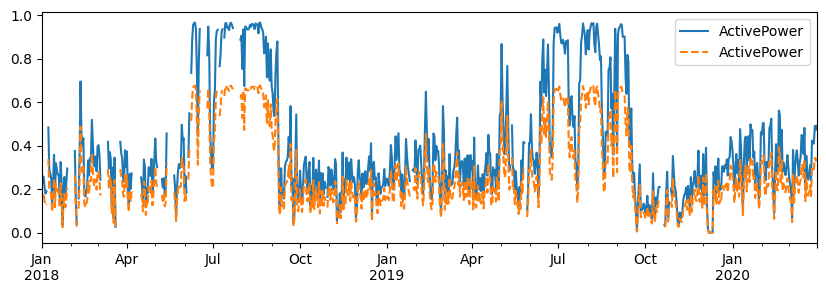

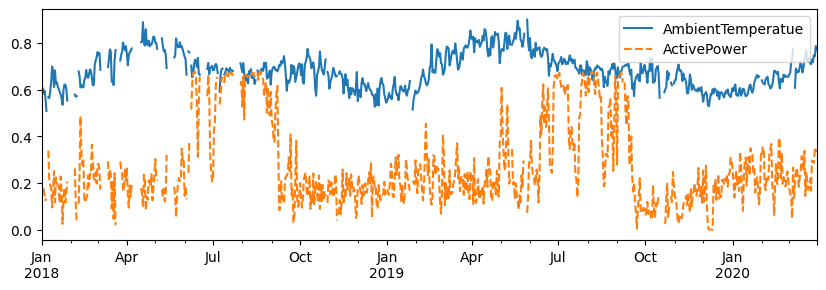

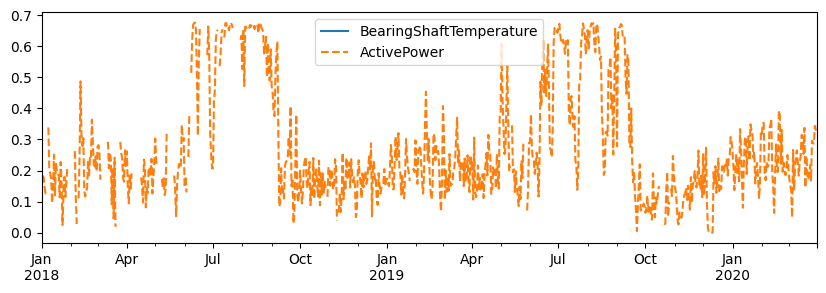

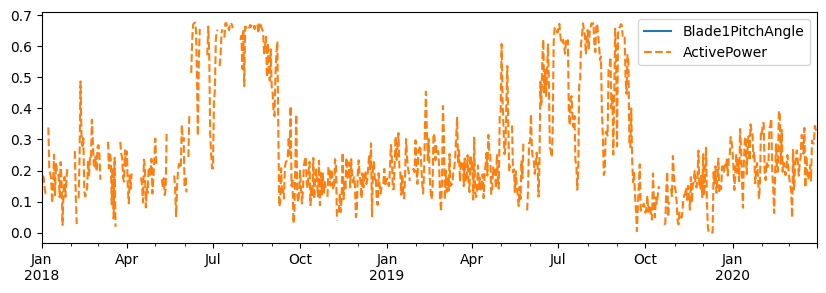

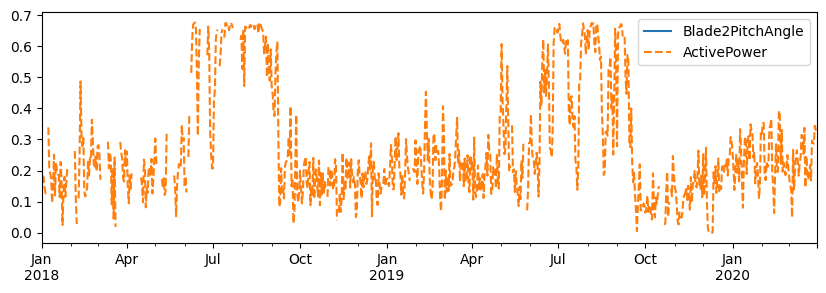

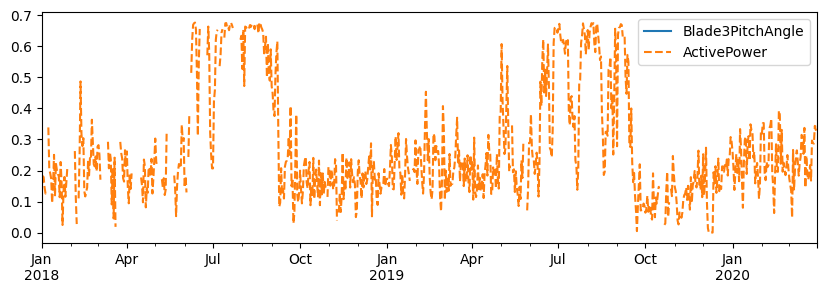

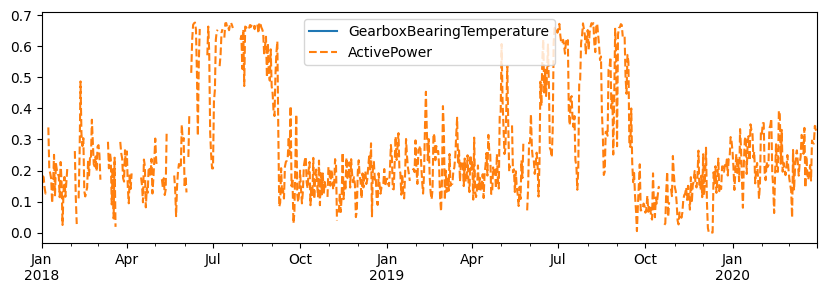

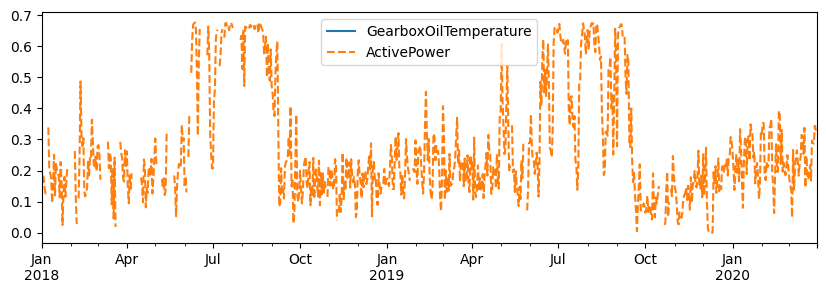

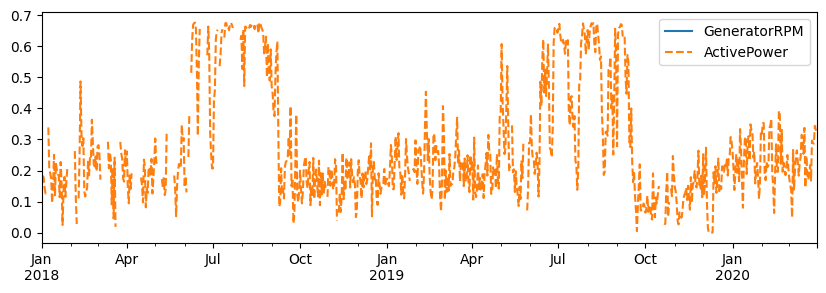

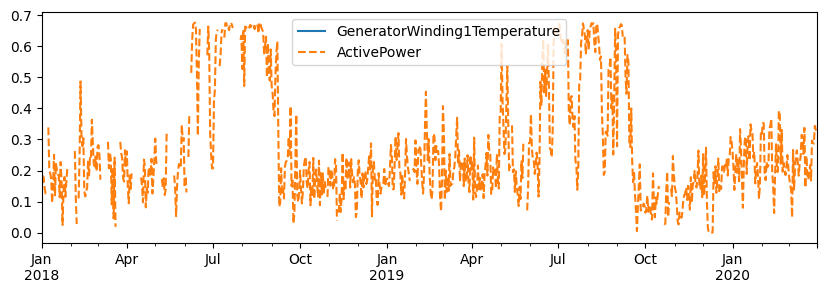

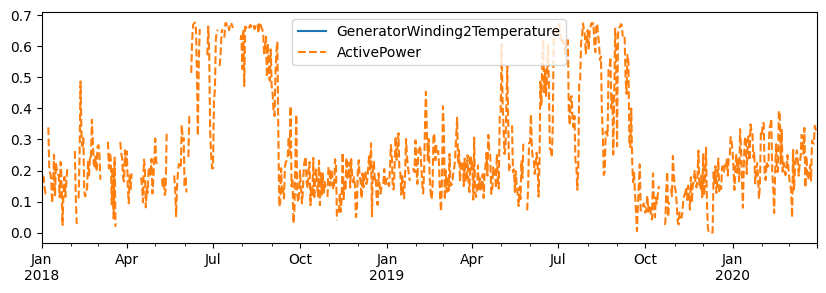

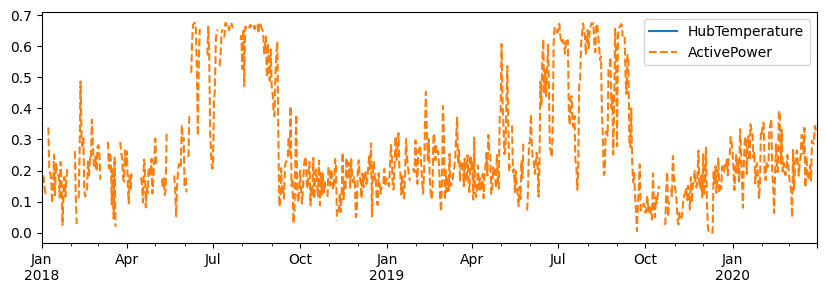

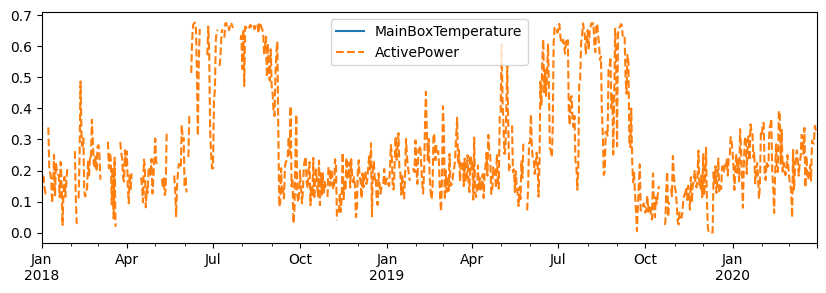

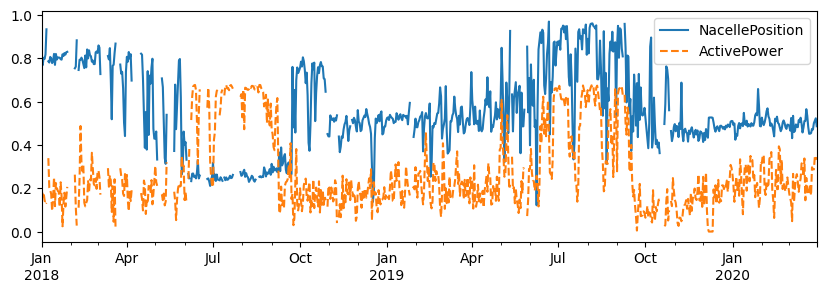

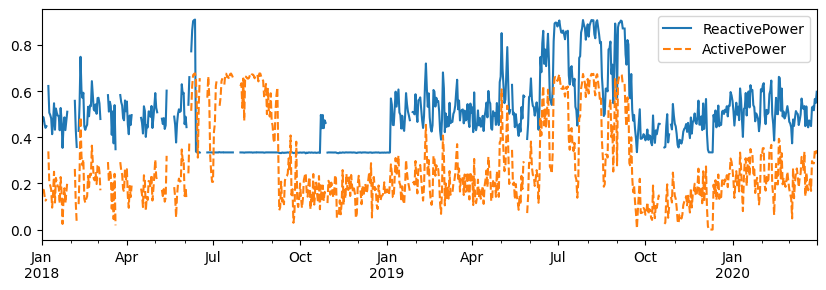

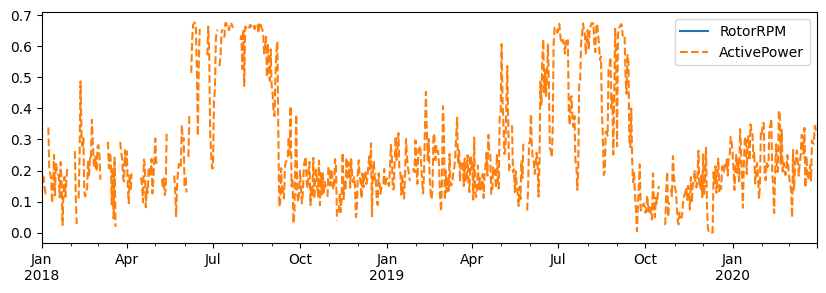

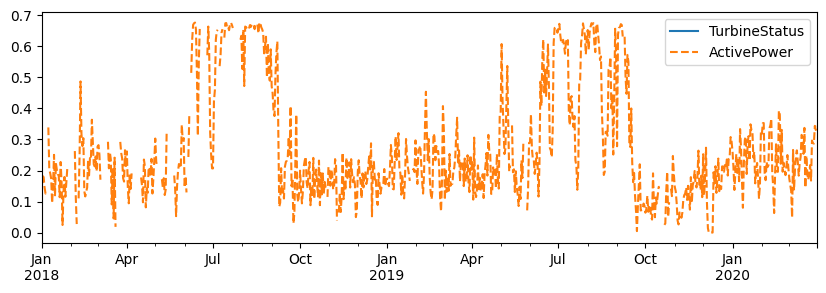

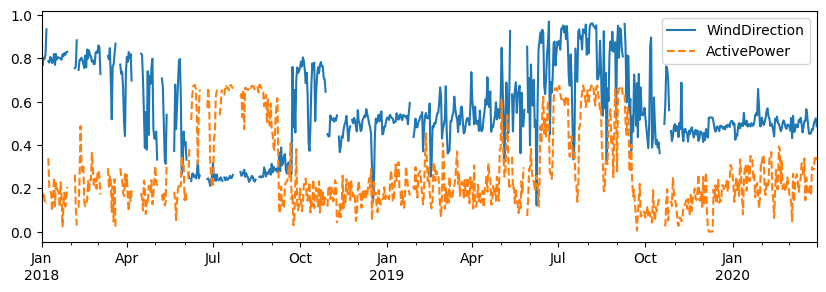

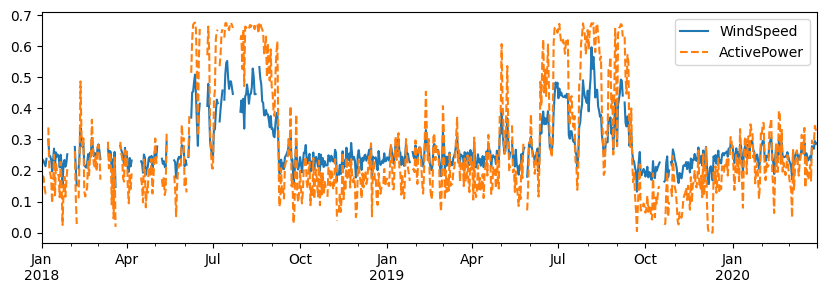

In [18]:
#data visualization
d2 = data.copy()
for i in data:
    mini = min(d2[i])
    maxi = max(d2[i])
    d2[i] = (d2[i]- mini)/(maxi-mini)
    
    plt.figure(figsize=(10,3))
    d2[i].resample('D').mean().plot(legend=i)
    (d2['ActivePower']*0.7).resample('D').mean().plot(style='--', legend='ActivePower')
    plt.legend()
    plt.show()

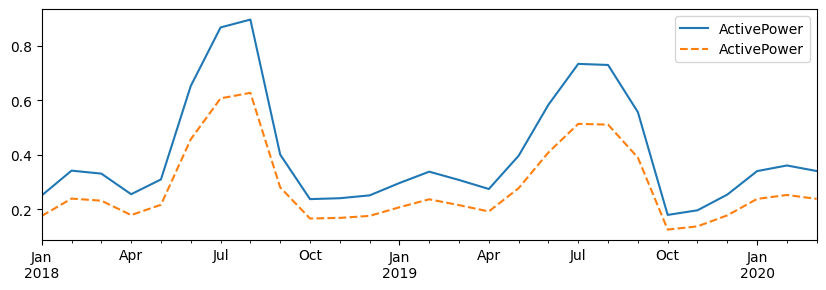

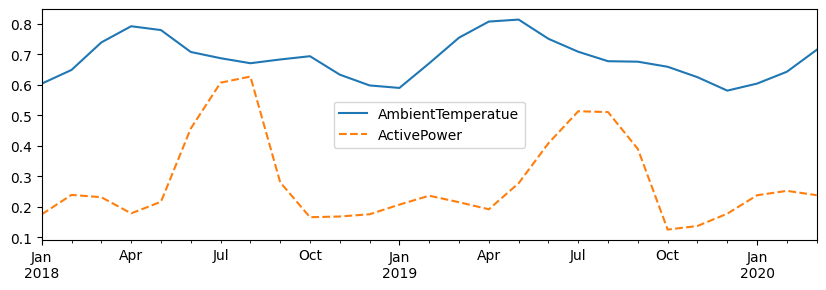

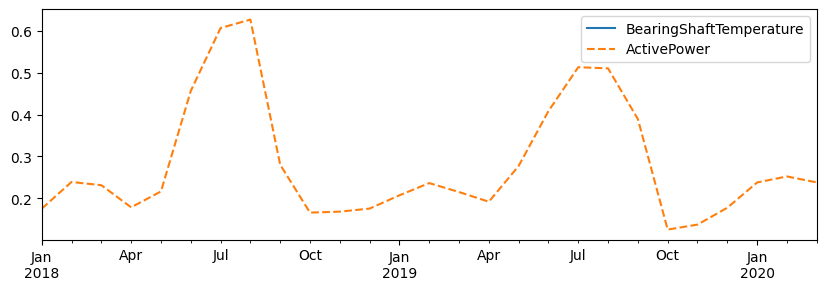

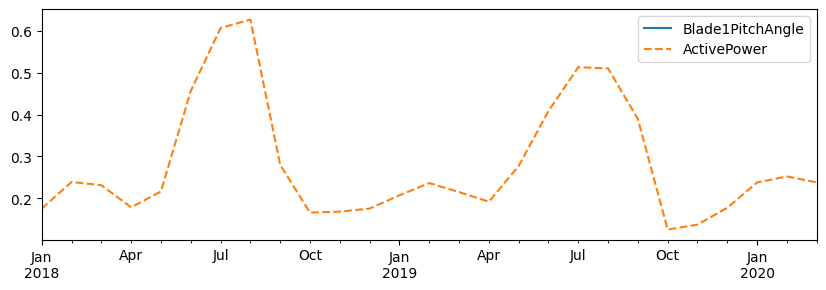

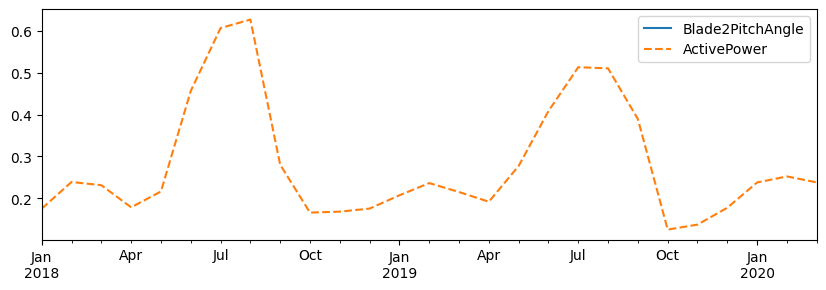

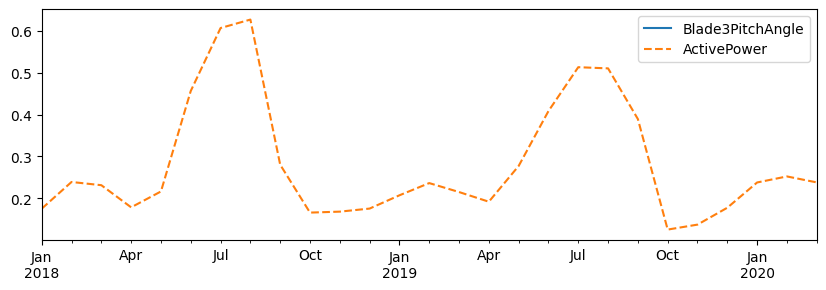

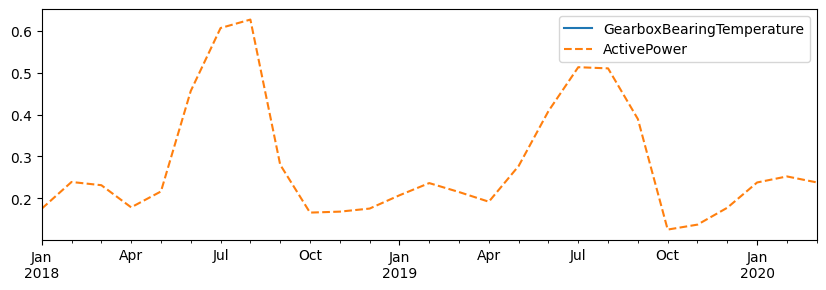

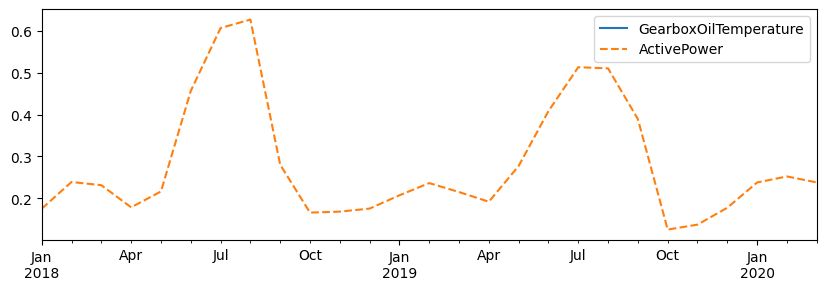

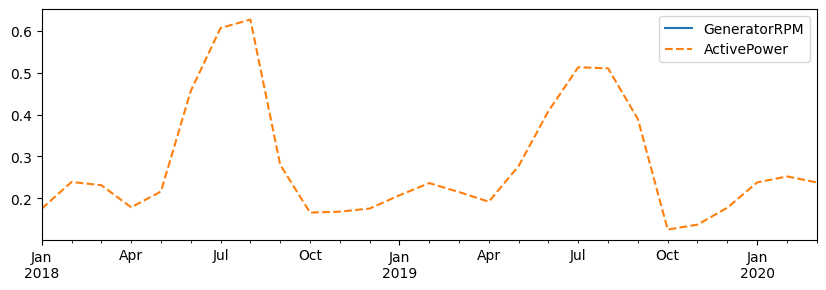

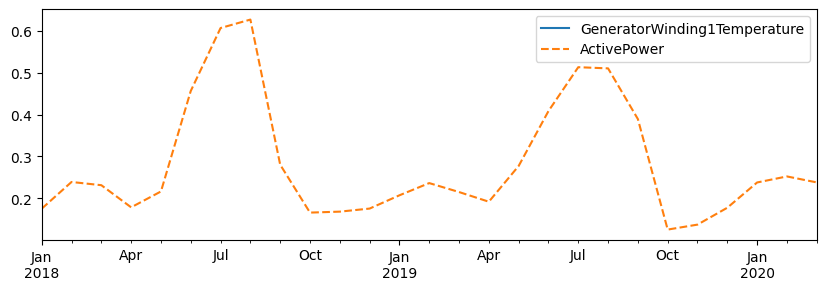

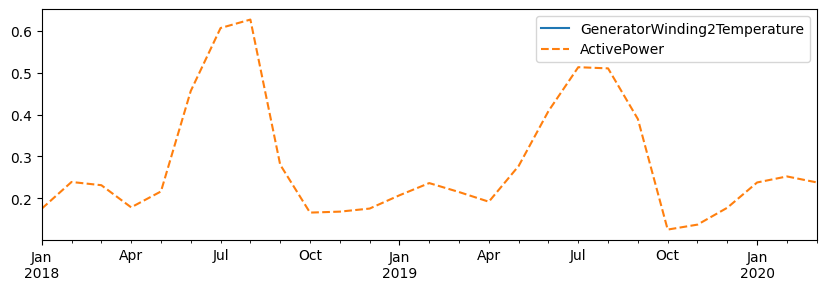

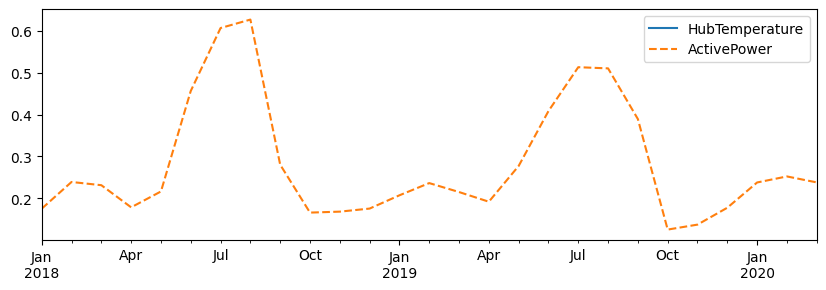

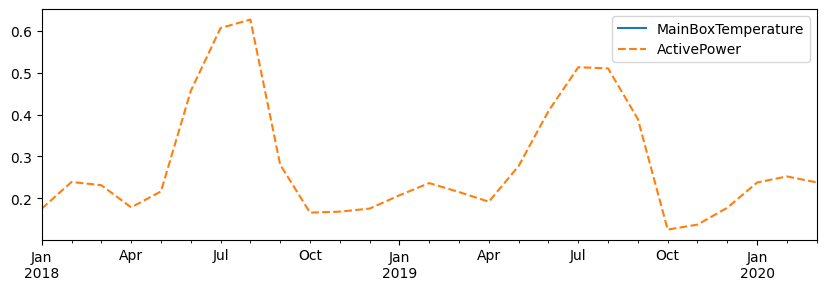

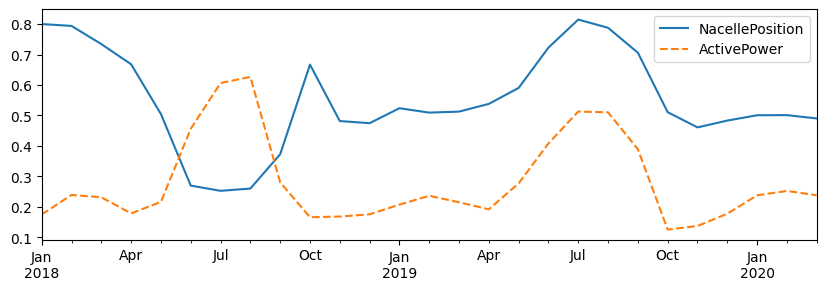

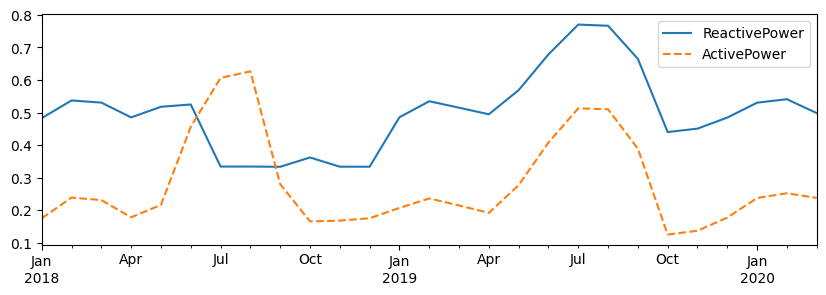

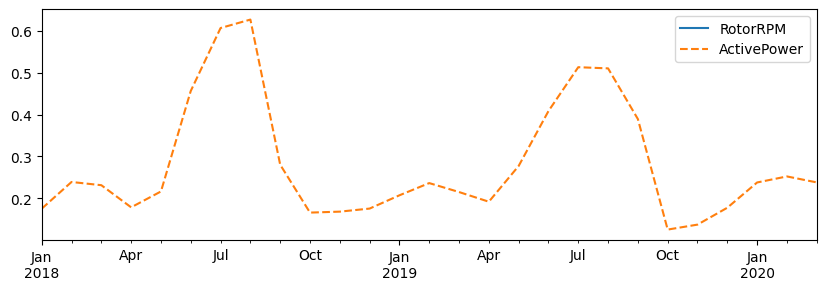

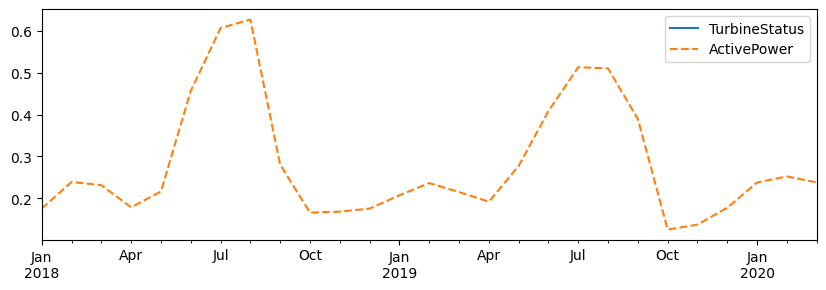

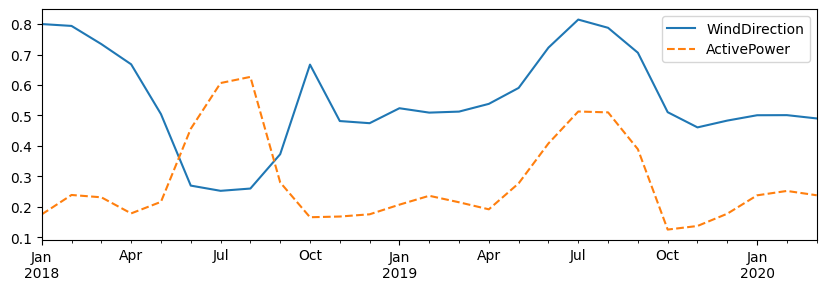

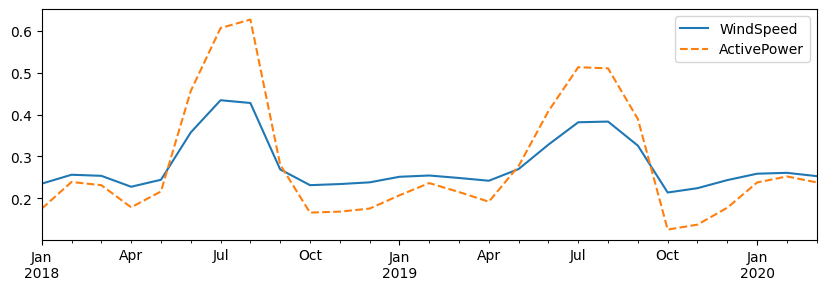

In [19]:
for i in data:

    
    plt.figure(figsize=(10,3))
    d2[i].resample('M').mean().plot(legend=i)
    (d2['ActivePower']*0.7).resample('M').mean().plot(style='--', legend='ActivePower')
    plt.legend()
    plt.show()

<AxesSubplot:>

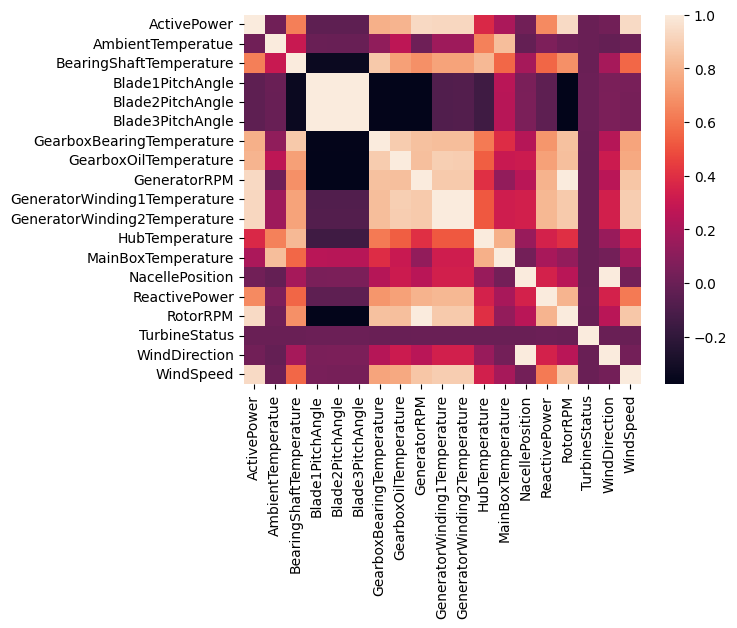

In [20]:
sns.heatmap(data.corr())

In [21]:
correlations = data.corr().unstack().sort_values(ascending=False) 

# checking  ActivePower correlations
correlations['ActivePower'].drop_duplicates()

ActivePower                     1.000000
WindSpeed                       0.937870
RotorRPM                        0.935928
GeneratorRPM                    0.934303
GeneratorWinding2Temperature    0.928769
GeneratorWinding1Temperature    0.927517
GearboxOilTemperature           0.801319
GearboxBearingTemperature       0.786150
ReactivePower                   0.662808
BearingShaftTemperature         0.631922
HubTemperature                  0.372788
MainBoxTemperature              0.207514
WindDirection                   0.024547
AmbientTemperatue               0.019064
TurbineStatus                  -0.001115
Blade1PitchAngle               -0.042637
Blade3PitchAngle               -0.042700
dtype: float64

In [22]:
data = data[['ActivePower','WindSpeed']]
data.dropna()

,ActivePower,WindSpeed
2018-01-01 06:20:00+00:00,26.212347,3.042750
2018-01-01 06:40:00+00:00,59.632658,3.424814
2018-01-01 06:50:00+00:00,40.889650,3.507172
2018-01-01 10:40:00+00:00,34.398111,3.442212
2018-01-01 12:00:00+00:00,29.797653,3.031363
...,...,...
2020-03-30 23:10:00+00:00,70.044465,3.533445
2020-03-30 23:20:00+00:00,40.833474,3.261231
2020-03-30 23:30:00+00:00,20.777790,3.331839
2020-03-30 23:40:00+00:00,62.091039,3.284468


In [23]:
len(data)

78989

In [24]:
X_train, X_test, y_train,y_test = data['WindSpeed'][0:78000], data['WindSpeed'][78000:], data['ActivePower'][0:78000],  data['ActivePower'][78000:]
len(X_train),len(X_test),len(y_train),len(y_test)

(78000, 989, 78000, 989)

In [25]:
model = xgb.XGBRegressor(n_estimators = 200)

In [28]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

# Ensure y_train and y_test are 1D arrays
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# Fit the model
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
          early_stopping_rounds=50, verbose=True)

[0]	validation_0-rmse:669.43793	validation_1-rmse:630.97754
[1]	validation_0-rmse:472.49561	validation_1-rmse:452.89584
[2]	validation_0-rmse:336.13138	validation_1-rmse:329.72470
[3]	validation_0-rmse:242.74567	validation_1-rmse:245.43164
[4]	validation_0-rmse:180.03647	validation_1-rmse:188.71967
[5]	validation_0-rmse:139.27387	validation_1-rmse:151.41365
[6]	validation_0-rmse:114.02331	validation_1-rmse:127.56200
[7]	validation_0-rmse:99.26288	validation_1-rmse:112.70991
[8]	validation_0-rmse:91.07503	validation_1-rmse:103.68066
[9]	validation_0-rmse:86.73362	validation_1-rmse:98.22848
[10]	validation_0-rmse:84.49381	validation_1-rmse:94.86729
[11]	validation_0-rmse:83.32263	validation_1-rmse:92.74010
[12]	validation_0-rmse:82.74160	validation_1-rmse:91.44647
[13]	validation_0-rmse:82.41200	validation_1-rmse:90.57885
[14]	validation_0-rmse:82.22685	validation_1-rmse:90.03059
[15]	validation_0-rmse:82.03690	validation_1-rmse:89.61250
[16]	validation_0-rmse:81.96307	validation_1-rmse:

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [29]:
pred = model.predict(X_test)

In [30]:
df_final = pd.DataFrame(data={'Actuals':y_test, 'Predictions':pred })  

In [31]:
from sklearn.metrics import *
print('The Coefficient of determination (R-squared) = {:.3f}'.format(r2_score(df_final['Actuals'],df_final['Predictions'])))
print('The mean absolute error (MAE)                = {:.2f}'.format(mean_absolute_error(df_final['Actuals'],df_final['Predictions'])))
print('The RMSE error (RMSE)                        = {:.2f}'.format(mean_squared_error(df_final['Actuals'],df_final['Predictions'],squared=False)))
print('The Mean absolute percentage error (MAPE)    = {:.3f}'.format(mean_absolute_percentage_error(df_final['Actuals'],df_final['Predictions'])))  

The Coefficient of determination (R-squared) = 0.970
The mean absolute error (MAE)                = 63.13
The RMSE error (RMSE)                        = 88.84
The Mean absolute percentage error (MAPE)    = 0.476


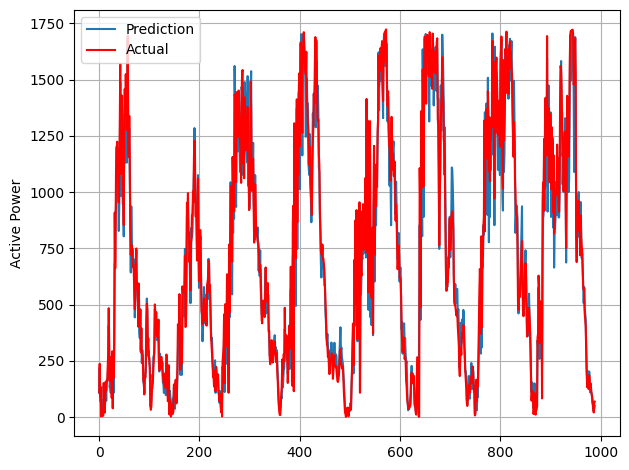

In [32]:
plt.plot(df_final['Predictions'],label='Prediction')
plt.plot(df_final['Actuals'], color='red',label='Actual')

plt.ylabel('Active Power')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

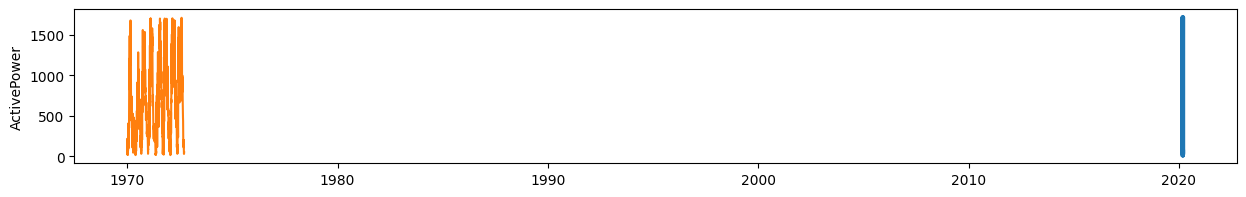

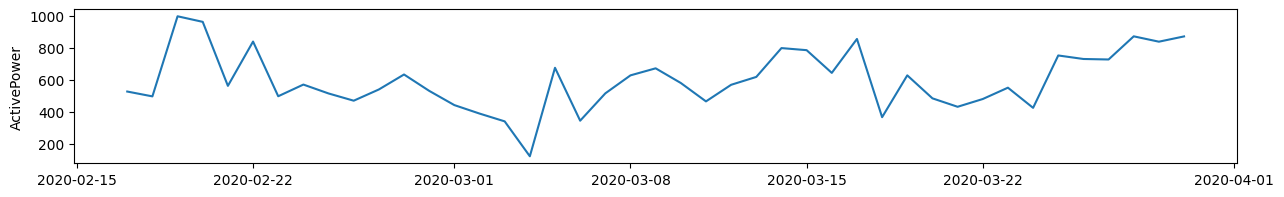

In [33]:
plt.figure(figsize=(15,2))
sns.lineplot(data = data['ActivePower'][74000:])
sns.lineplot(data = df_final['Predictions'])

plt.figure(figsize=(15,2))
sns.lineplot(data = data['ActivePower'][74000:].resample('D').mean())
sns.lineplot(data = df_final['Predictions'].resample('D').mean())

# New test only dates as features

In [34]:
data.tail()

,ActivePower,WindSpeed
2020-03-30 23:10:00+00:00,70.044465,3.533445
2020-03-30 23:20:00+00:00,40.833474,3.261231
2020-03-30 23:30:00+00:00,20.777790,3.331839
2020-03-30 23:40:00+00:00,62.091039,3.284468
2020-03-30 23:50:00+00:00,68.664425,3.475205


In [35]:
new = pd.date_range('2020-04-01 12:00:00+00:00','2020-06-01 12:00:00+00:00', freq='10min')
new = pd.DataFrame(index=new)

In [36]:
len(new)

8785

In [37]:
def create_f(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['minute'] = df.index.minute
    df['day'] = df.index.day
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofweek'] = df.index.dayofweek
    df['dayofyear'] = df.index.dayofyear
    df['weekofyear'] = df.index.isocalendar().week
    
    return df

In [38]:
data2 = data.copy()
data2 = create_f(data2)

In [39]:
data2.head()

,ActivePower,WindSpeed,hour,minute,day,month,year,dayofweek,dayofyear,weekofyear
2018-01-01 06:20:00+00:00,26.212347,3.042750,6,20,1,1,2018,0,1,1
2018-01-01 06:40:00+00:00,59.632658,3.424814,6,40,1,1,2018,0,1,1
2018-01-01 06:50:00+00:00,40.889650,3.507172,6,50,1,1,2018,0,1,1
2018-01-01 10:40:00+00:00,34.398111,3.442212,10,40,1,1,2018,0,1,1
2018-01-01 12:00:00+00:00,29.797653,3.031363,12,0,1,1,2018,0,1,1


In [40]:
data2.columns

Index(['ActivePower', 'WindSpeed', 'hour', 'minute', 'day', 'month', 'year',
       'dayofweek', 'dayofyear', 'weekofyear'],
      dtype='object')

In [41]:
data2.isna().sum()
data2 = data2.dropna()

In [42]:
features = ['hour', 'minute', 'day', 'month', 'year','dayofweek', 'dayofyear']
label = 'ActivePower'
X_train, X_test, y_train,y_test = data2[features][0:78000], data2[features][78000:], data2[label][0:78000],  data2[label][78000:]
len(X_train),len(X_test),len(y_train),len(y_test)

(78000, 681, 78000, 681)

In [43]:
model2 = xgb.XGBRegressor(n_estimators = 1000,learning_rate=0.01)
model2.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
          early_stopping_rounds=50,verbose=True) 

[0]	validation_0-rmse:939.67261	validation_1-rmse:945.87244
[1]	validation_0-rmse:931.87775	validation_1-rmse:941.88672
[2]	validation_0-rmse:924.17566	validation_1-rmse:937.94861
[3]	validation_0-rmse:916.55792	validation_1-rmse:933.67572
[4]	validation_0-rmse:909.03040	validation_1-rmse:929.83594
[5]	validation_0-rmse:901.58105	validation_1-rmse:925.58044
[6]	validation_0-rmse:894.21686	validation_1-rmse:921.37494
[7]	validation_0-rmse:886.95795	validation_1-rmse:917.21906
[8]	validation_0-rmse:879.75903	validation_1-rmse:912.95874
[9]	validation_0-rmse:872.69183	validation_1-rmse:908.74811
[10]	validation_0-rmse:865.70996	validation_1-rmse:904.58624
[11]	validation_0-rmse:858.78278	validation_1-rmse:901.06348
[12]	validation_0-rmse:851.92212	validation_1-rmse:896.99493
[13]	validation_0-rmse:845.14386	validation_1-rmse:892.97388
[14]	validation_0-rmse:838.45148	validation_1-rmse:889.15301
[15]	validation_0-rmse:831.83484	validation_1-rmse:885.22595
[16]	validation_0-rmse:825.29834	v

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [44]:
pred = model2.predict(X_test)

In [45]:
df_final2 = pd.DataFrame(data={'Actuals':y_test, 'Predictions':pred})  

In [46]:
from sklearn.metrics import *
print('The Coefficient of determination (R-squared) = {:.3f}'.format(r2_score(df_final2['Actuals'],df_final2['Predictions'])))
print('The mean absolute error (MAE)                = {:.2f}'.format(mean_absolute_error(df_final2['Actuals'],df_final2['Predictions'])))
print('The RMSE error (RMSE)                        = {:.2f}'.format(mean_squared_error(df_final2['Actuals'],df_final2['Predictions'],squared=False)))
print('The Mean absolute percentage error (MAPE)    = {:.3f}'.format(mean_absolute_percentage_error(df_final2['Actuals'],df_final2['Predictions'])))  

The Coefficient of determination (R-squared) = -0.050
The mean absolute error (MAE)                = 412.24
The RMSE error (RMSE)                        = 544.07
The Mean absolute percentage error (MAPE)    = 2.244


<AxesSubplot:ylabel='ActivePower'>

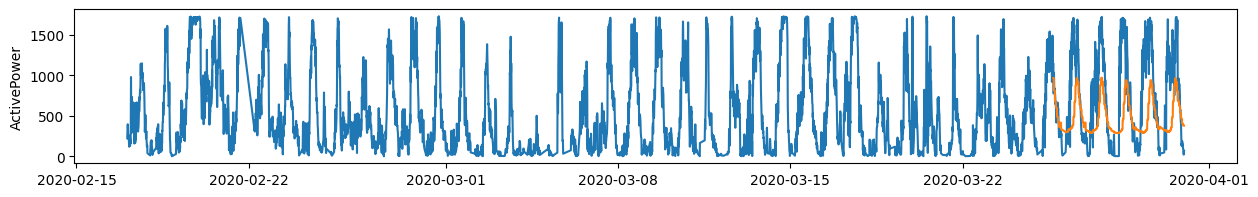

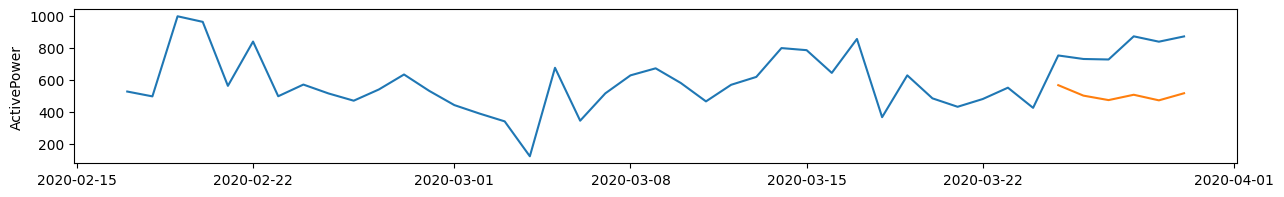

In [47]:
plt.figure(figsize=(15,2))
sns.lineplot(data = data[label][74000:])
sns.lineplot(data = df_final2['Predictions'])

plt.figure(figsize=(15,2))
sns.lineplot(data = data[label][74000:].resample('D').mean())
sns.lineplot(data = df_final2['Predictions'].resample('D').mean())

In [48]:
new = create_f(new)
print(new[features].head())
fut = model2.predict(new[features])
future = pd.DataFrame(data={'Predictions':fut}, index = new.index)  

                           hour  minute  day  month  year  dayofweek  \
2020-04-01 12:00:00+00:00    12       0    1      4  2020          2   
2020-04-01 12:10:00+00:00    12      10    1      4  2020          2   
2020-04-01 12:20:00+00:00    12      20    1      4  2020          2   
2020-04-01 12:30:00+00:00    12      30    1      4  2020          2   
2020-04-01 12:40:00+00:00    12      40    1      4  2020          2   

                           dayofyear  
2020-04-01 12:00:00+00:00         92  
2020-04-01 12:10:00+00:00         92  
2020-04-01 12:20:00+00:00         92  
2020-04-01 12:30:00+00:00         92  
2020-04-01 12:40:00+00:00         92  


<AxesSubplot:ylabel='ActivePower'>

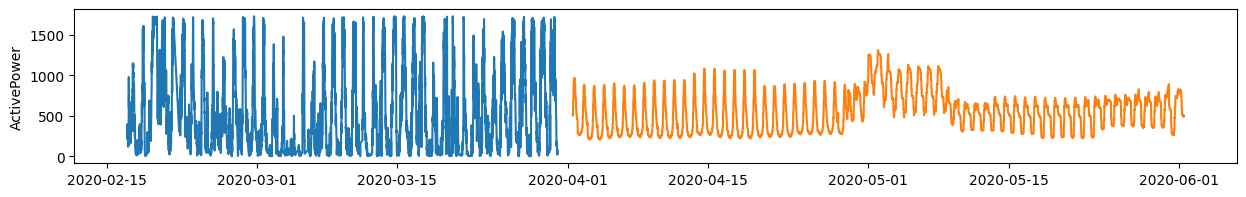

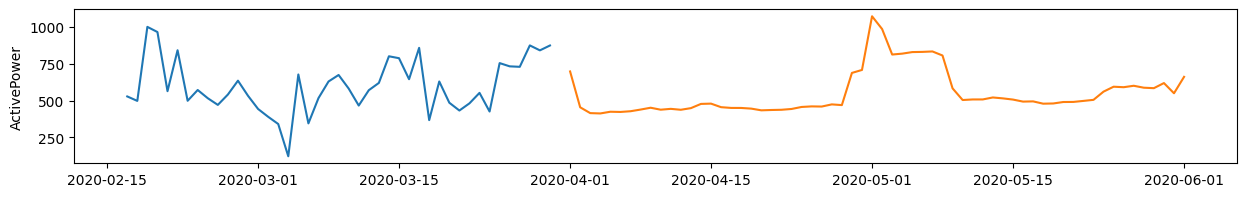

In [49]:
plt.figure(figsize=(15,2))
sns.lineplot(data = data[label][74000:])
sns.lineplot(data = future['Predictions'])

plt.figure(figsize=(15,2))
sns.lineplot(data = data[label][74000:].resample('D').mean())
sns.lineplot(data = future['Predictions'].resample('D').mean())

# saving the models

In [50]:
import pickle
file_name = "model2.pkl"
#model.save_model('model1.json')
pickle.dump(model2, open(file_name, "wb"))